<a href="https://colab.research.google.com/github/dharpranoy/Neural-Net-GoogleColab/blob/main/Beans_Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset,metadata=tfds.load('beans',with_info=True,as_supervised=True)
train_data,test_data=dataset['train'],dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteG7PNBD/beans-train.tfrecord


  0%|          | 0/1034 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteG7PNBD/beans-validation.tfrecord


  0%|          | 0/133 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteG7PNBD/beans-test.tfrecord


  0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [3]:
metadata

tfds.core.DatasetInfo(
    name='beans',
    version=0.1.0,
    description='Beans is a dataset of images of beans taken in the field using smartphone
cameras. It consists of 3 classes: 2 disease classes and the healthy class.
Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
by experts from the National Crops Resources Research Institute (NaCRRI) in
Uganda and collected by the Makerere AI research lab.',
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=1295,
    splits={
        'test': 128,
        'train': 1034,
        'validation': 133,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {beansdata,
        author="Makerere AI Lab",
        title="Bean disease dataset",
        month="January",
        year="2020",
        url="https://git

In [4]:
train_num=metadata.splits['train'].num_examples
test_num=metadata.splits['test'].num_examples
print(train_num,test_num)

1034 128


In [5]:
BATCH_SIZE=10
IMG_SIZE=500

In [6]:
def normalize(images,label):
  images=tf.cast(images,tf.float32)
  images/=255
  return images,label
train_data=train_data.map(map_func=normalize).batch(BATCH_SIZE)
test_data=test_data.map(map_func=normalize)

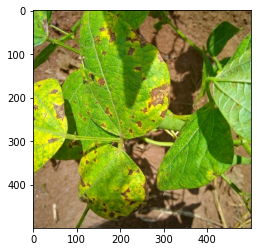

In [7]:
for images,lbl in test_data.take(count=1):
  plt.imshow(X=images)

In [8]:
model=tf.keras.models.Sequential(layers=[
          tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(500,500,3)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units=128,activation='relu'),
          tf.keras.layers.Dense(units=128,activation='relu'),
          tf.keras.layers.Dense(units=128,activation='relu'),
          tf.keras.layers.Dense(units=3)
])

In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [10]:
model.fit(
    x=train_data,
    epochs=12,
    steps_per_epoch=np.ceil(train_num/BATCH_SIZE) 
)

Epoch 1/12
104/104 [==============================] - 36s 225ms/step - loss: 1.1566 - accuracy: 0.3656
Epoch 2/12
104/104 [==============================] - 23s 217ms/step - loss: 0.9754 - accuracy: 0.5290
Epoch 3/12
104/104 [==============================] - 23s 217ms/step - loss: 0.8351 - accuracy: 0.6267
Epoch 4/12
104/104 [==============================] - 23s 216ms/step - loss: 0.7113 - accuracy: 0.6905
Epoch 5/12
104/104 [==============================] - 23s 218ms/step - loss: 0.5671 - accuracy: 0.7611
Epoch 6/12
104/104 [==============================] - 23s 217ms/step - loss: 0.5133 - accuracy: 0.7892
Epoch 7/12
104/104 [==============================] - 23s 218ms/step - loss: 0.3415 - accuracy: 0.8752
Epoch 8/12
104/104 [==============================] - 23s 217ms/step - loss: 0.1555 - accuracy: 0.9507
Epoch 9/12
104/104 [==============================] - 23s 218ms/step - loss: 0.1225 - accuracy: 0.9632
Epoch 10/12
104/104 [==============================] - 23s 216ms/step - l

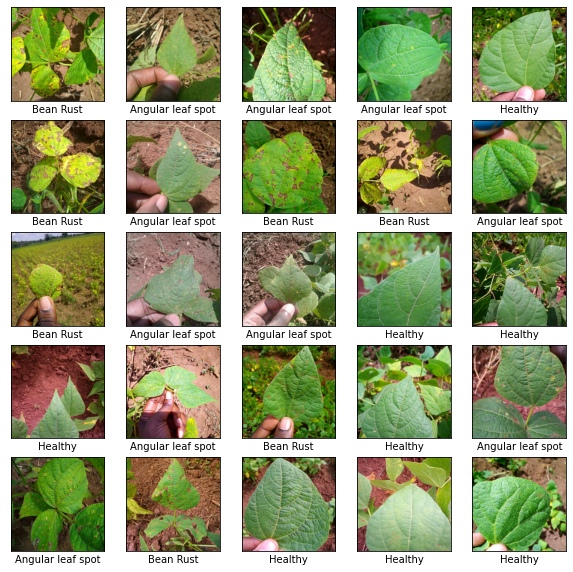

In [11]:
class_names=["Bean Rust","Angular leaf spot","Healthy"]
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_data.take(count=25):
    image = image.numpy().reshape((500,500,3))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(b=False)
    plt.imshow(X=image, cmap=plt.cm.binary)
    plt.xlabel(xlabel=class_names[label])
    i += 1
plt.show()

[[ 1.3737936 -1.5085206 -0.4669698]]


'Bean Rust'

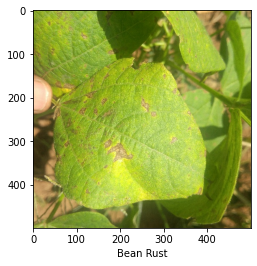

In [37]:
import random
for (img,lbl) in test_data.take(count=random.randint(1,115)):
  plt.imshow(X=img)
  plt.xlabel(xlabel=class_names[lbl])
img=img.numpy().reshape(500,500,3)
img=np.expand_dims(img,axis=0)
predictions=model.predict(img)
print(predictions)
class_names[np.argmax(a=predictions)]